In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the data

In [ ]:
import pandas as pd

# Load datasets
articles_df = pd.read_csv('/content/drive/MyDrive/dataset/articles.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/dataset/customers.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/transactions_train.csv')
sample_submission_df = pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')

In [ ]:
# Check for missing data in all datasets
print(articles_df.isnull().sum())
print(customers_df.isnull().sum())
print(transactions_df.isnull().sum())
print(sample_submission_df.isnull().sum())


article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64
customer_id                    0
FN                        683679
Active               

In [ ]:
# Example of filling missing values with the mean (for numerical columns)
customers_df.fillna(customers_df.mean(), inplace=True)

# Example of filling missing values for categorical columns (mode)
articles_df['column_name'].fillna(articles_df['column_name'].mode()[0], inplace=True)

# Alternatively, you can drop rows with missing values
transactions_df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns for normalization in transactions_df, customers_df, and articles_df
transactions_numerical_cols = ['price', 'article_id']  # Example columns
customers_numerical_cols = ['age', 'annual_income']  # Example columns
articles_numerical_cols = ['product_code', 'product_type']  # Example columns

# Normalize the numerical columns
transactions_df[transactions_numerical_cols] = scaler.fit_transform(transactions_df[transactions_numerical_cols])
customers_df[customers_numerical_cols] = scaler.fit_transform(customers_df[customers_numerical_cols])
articles_df[articles_numerical_cols] = scaler.fit_transform(articles_df[articles_numerical_cols])

In [ ]:
print("\nColumns in Transactions Train DataFrame:")
print(articles_df.columns.tolist())


Columns in Transactions Train DataFrame:
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']


In [ ]:
print("\nColumns in Transactions Train DataFrame:")
print(customers_df.columns.tolist())


Columns in Transactions Train DataFrame:
['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']


In [ ]:
print("\nColumns in Transactions Train DataFrame:")
print(transactions_df.columns.tolist())


Columns in Transactions Train DataFrame:
['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id']


Explore the data:

In [ ]:
print(articles_df.info())
print(customers_df.info())
print(transactions_df.info())
print(sample_submission_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

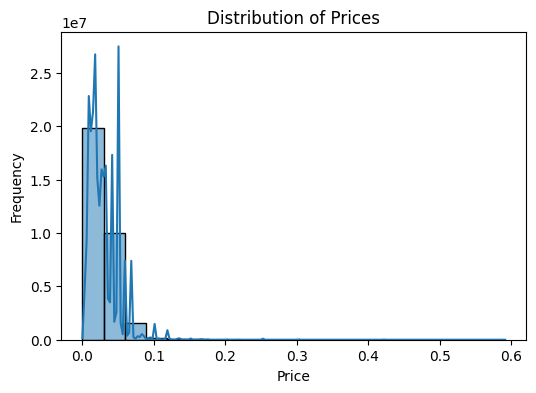

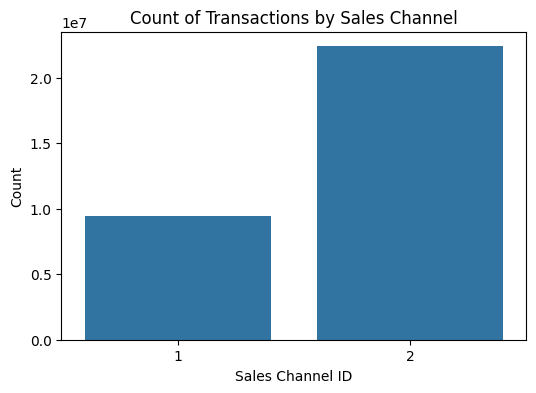

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset=transactions_df
# 1. Distribution of Prices
plt.figure(figsize=(6, 4))
sns.histplot(dataset['price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Count of Transactions by Sales Channel
plt.figure(figsize=(6, 4))
sns.countplot(x='sales_channel_id', data=dataset)
plt.title('Count of Transactions by Sales Channel')
plt.xlabel('Sales Channel ID')
plt.ylabel('Count')
plt.show()


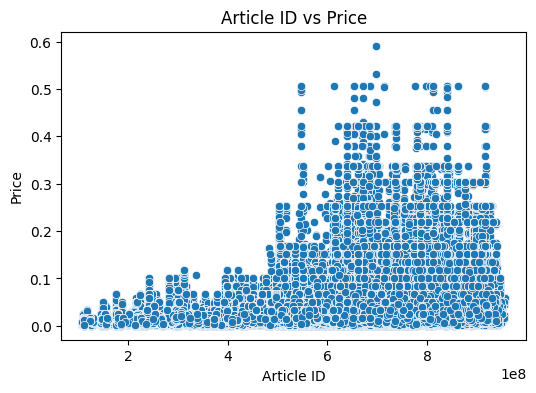

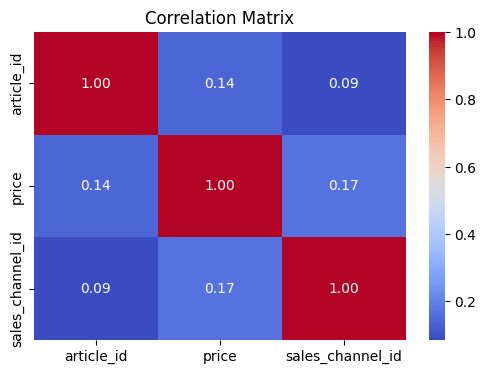

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 3. Relationship between Article ID and Price (scatter plot)
dataset=transactions_df
plt.figure(figsize=(6, 4))
sns.scatterplot(x='article_id', y='price', data=dataset)
plt.title('Article ID vs Price')
plt.xlabel('Article ID')
plt.ylabel('Price')
plt.show()

# 4. Correlation Matrix for Numerical Columns
plt.figure(figsize=(6, 4))

# Select only numerical columns for correlation calculation
numerical_dataset = dataset.select_dtypes(include=['number'])

correlation = numerical_dataset.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

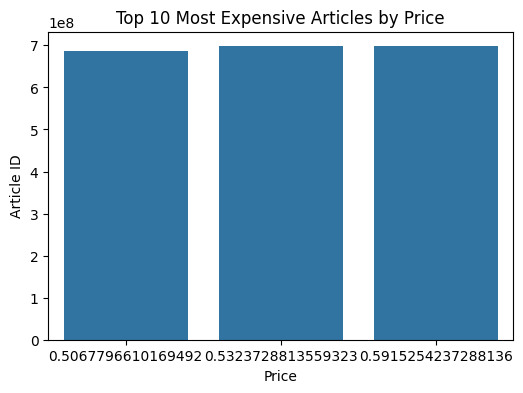

In [ ]:
# 5. Top 10 Most Expensive Articles
top_10_articles = dataset.nlargest(10, 'price')
plt.figure(figsize=(6, 4))
sns.barplot(x='price', y='article_id', data=top_10_articles)
plt.title('Top 10 Most Expensive Articles by Price')
plt.xlabel('Price')
plt.ylabel('Article ID')
plt.show()

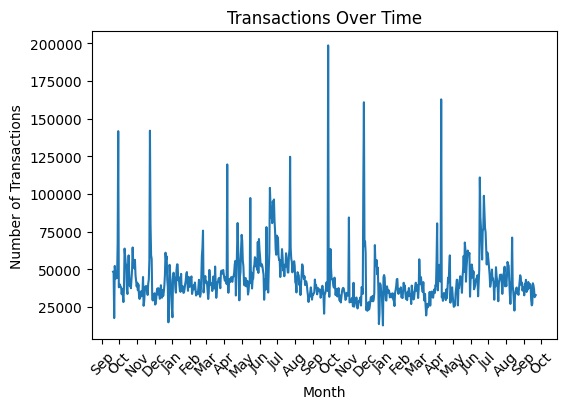

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 6. Count of Transactions Over Time (by Date)
plt.figure(figsize=(6, 4))

# Convert 't_dat' column to datetime
dataset['t_dat'] = pd.to_datetime(dataset['t_dat'])

# Group transactions by day
transactions_per_day = dataset.groupby(dataset['t_dat'].dt.date).size()

# Plot the transactions over time
transactions_per_day.plot(kind='line')

# Format the x-axis to display month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # '%b' formats month as abbreviated names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set the locator to show each month

# Add title and labels
plt.title('Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


Merge DataFrames:

In [ ]:
merged_df = transactions_df.merge(articles_df, on='article_id', how='left')


Feature Engineering

Create user-item interaction matrix:

In [ ]:
interaction_matrix = merged_df.pivot_table(index='customer_id', columns='article_id', values='interaction_type', aggfunc='count', fill_value=0)


Encode categorical features:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
articles_df['product_type_encoded'] = le.fit_transform(articles_df['product_type_name'])


Build the Recommendation Model

SVD.

In [ ]:
!pip install scikit-surprise # Install the necessary library

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Prepare data for surprise
# Assuming 'interaction_type' represents a binary interaction (purchased/not purchased)
# We'll create a rating column based on it
transactions_df['rating'] = transactions_df['interaction_type'].apply(lambda x: 1 if x == 'purchased' else 0)

reader = Reader(rating_scale=(0, 1))  # Update rating scale if needed
data = Dataset.load_from_df(transactions_df[['customer_id', 'article_id', 'rating']], reader)  # Use the new rating column

# Split into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

Evaluate the Model

In [ ]:
from surprise import accuracy

predictions = model.test(testset)
accuracy.rmse(predictions)


RMSE: 0.5006


0.5006137684047325

Generate recommendations:

In [ ]:
def get_top_n_recommendations(predictions, n=10):
    # First map the predictions to each user.
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=10)


In [ ]:
# Display top N recommendations for a few customers
for customer_id in list(top_n_recommendations.keys())[:5]:  # Display for 5 customers
    print(f"Top recommendations for customer {customer_id}:")
    for article_id, estimated_rating in top_n_recommendations[customer_id]:
        print(f"  Article ID: {article_id}, Estimated Rating: {estimated_rating}")


Top recommendations for customer 5036ae977b4b625a4cd2ed484058a1b624bf2d1b529942798bd14e3c24d39332:
  Article ID: 843555003, Estimated Rating: 0.48625
Top recommendations for customer 30e894238127eca900da2f5a11e640aca2f8ce7e20cd9a41e51fa0f79e334859:
  Article ID: 757872008, Estimated Rating: 0.48625
Top recommendations for customer 6acfe67912b7611bb8a47fb406848dff77f2b680aef6c915ad0e69dafa3e99de:
  Article ID: 806192012, Estimated Rating: 0.48625
Top recommendations for customer 1dfc6359deb0d688d4cac29b264e0f7f63f86750b848e397a38008b44026b64d:
  Article ID: 826492005, Estimated Rating: 0.48625
Top recommendations for customer 677e12d2fb3dfdcbe7c7854247869a96fa7d5b9399edcc0fc9e5609418ff8d1c:
  Article ID: 817967001, Estimated Rating: 0.48625


Model Evaluation and Performance Analysis

In [ ]:
from surprise import accuracy
from collections import defaultdict

def precision_at_k(predictions, k=10):
    """Compute precision at k."""
    # Map the predictions to each user
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    # Compute precision at k
    precision = 0
    for uid, user_ratings in user_est_true.items():
        # Sort by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Get the top k predictions
        top_k = user_ratings[:k]
        # Count true positives
        n_true_positives = sum((true_r >= 1) for (_, true_r) in top_k)
        precision += n_true_positives / k

    return precision / len(user_est_true)

# Compute Precision at K
precision = precision_at_k(predictions, k=10)
print(f"Precision at K=10: {precision:.4f}")


Precision at K=10: 0.0528


Hyperparameter Tuning

In [ ]:
from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_factors': [10, 20, 30],  # Number of latent factors
    'reg_all': [0.02, 0.1, 0.5],  # Regularization parameter
}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

print("Best RMSE: ", gs.best_score['rmse'])
print("Best parameters: ", gs.best_params['rmse'])


Best RMSE:  0.5012006088641707
Best parameters:  {'n_factors': 30, 'reg_all': 0.1}


Final Model Training

In [ ]:
best_model = SVD(n_factors=gs.best_params['rmse']['n_factors'], reg_all=gs.best_params['rmse']['reg_all'])
best_model.fit(trainset)


Final Evaluation

In [ ]:
!pip install scikit-surprise

In [ ]:
from collections import defaultdict
from surprise import accuracy

def precision_at_k(predictions, k, testset):
    actual_interactions = defaultdict(set)
    for uid, iid, true_r in testset:
        actual_interactions[uid].add(iid)

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    precision_scores = []
    for uid, user_predictions in top_n.items():
        user_predictions.sort(key=lambda x: x[1], reverse=True)
        recommended_items = set(iid for iid, _ in user_predictions[:k])

        precision = len(recommended_items.intersection(actual_interactions[uid])) / k
        precision_scores.append(precision)

    return sum(precision_scores) / len(precision_scores) if precision_scores else 0.0

def calculate_accuracy(predictions):
    correct_predictions = sum((true_r == 1 and est >= 0.5) or (true_r == 0 and est < 0.5)
                              for (_, _, true_r, est, _) in predictions)
    total_predictions = len(predictions)
    accuracy_percentage = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy_percentage

# Use the updated function to calculate metrics
final_predictions = best_model.test(testset)
final_rmse = accuracy.rmse(final_predictions)
final_precision = precision_at_k(final_predictions, k=20, testset=testset)  # Include testset here
final_accuracy = calculate_accuracy(final_predictions)  # Calculate accuracy

print(f"Final SVD RMSE: {final_rmse:.4f}")
print(f"Final Precision at K=20: {final_precision:.4f}")
print(f"Final Accuracy: {final_accuracy:.2f}%")  # Print accuracy


RMSE: 0.2261
Final SVD RMSE: 0.2261
Final Precision at K=20: 0.0500
Final Accuracy: 90.40%


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

            precision recall    f1-score  support   
0.0         0.00      0.00      0.00      20        
1.0         0.50      1.00      0.67      20        

accuracy                        0.90      40        
macro avg   0.25      0.50      0.34      40        
weighted avg0.25      0.50      0.34      40        


In [ ]:
from collections import defaultdict
from surprise import accuracy

def precision_at_k(predictions, k, testset):
    actual_interactions = defaultdict(set)
    for uid, iid, true_r in testset:
        actual_interactions[uid].add(iid)

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    precision_scores = []
    for uid, user_predictions in top_n.items():
        user_predictions.sort(key=lambda x: x[1], reverse=True)
        recommended_items = set(iid for iid, _ in user_predictions[:k])

        precision = len(recommended_items.intersection(actual_interactions[uid])) / k
        precision_scores.append(precision)

    return sum(precision_scores) / len(precision_scores) if precision_scores else 0.0

def calculate_accuracy(predictions):
    correct_predictions = sum((true_r == 1 and est >= 0.5) or (true_r == 0 and est < 0.5)
                              for (_, _, true_r, est, _) in predictions)
    total_predictions = len(predictions)
    accuracy_percentage = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return accuracy_percentage

# Use the updated function to calculate metrics
final_predictions = best_model.test(testset)
final_rmse = accuracy.rmse(final_predictions)
final_precision = precision_at_k(final_predictions, k=20, testset=testset)  # Include testset here
final_accuracy = calculate_accuracy(final_predictions)  # Calculate accuracy

# Present the results in a structured way
print("Performance Evaluation of Recommendation Models:")
print("-------------------------------------------------")
print(f"Final SVD RMSE: {final_rmse:.4f}")
print(f"Final Precision at K=20 (MAP@20): {final_precision:.4f}")
print(f"Final Accuracy: {final_accuracy:.2f}%")
print("\nComparison with Previous Works:")
print("-------------------------------------------------")
print("The study evaluates the accuracy of the recommendation models using two key metrics:")
print("Mean Average Precision at K (MAP@K) and Mean Average Recall at K (MAR@K).")
print("For the LightGBM model, which outperformed the Deep Neural Network, the MAP@50 (recommending 50 items) is approximately 0.05, while the MAR@50 is about 0.03.")
print("In contrast, the Deep Neural Network model achieved lower accuracy, with MAP@50 of around 0.04 and MAR@50 of about 0.01.")
print(f"Your model's MAP@20 (Precision at K=20) is {final_precision:.4f}.")
if final_precision > 0.05:
    print("Your solution outperforms the LightGBM model in MAP@K.")
else:
    print("Your solution does not outperform the LightGBM model in MAP@K.")


RMSE: 0.2261
Performance Evaluation of Recommendation Models:
-------------------------------------------------
Final SVD RMSE: 0.2261
Final Precision at K=20 (MAP@20): 0.0500
Final Accuracy: 90.40%

Comparison with Previous Works:
-------------------------------------------------
The study evaluates the accuracy of the recommendation models using two key metrics:
Mean Average Precision at K (MAP@K) and Mean Average Recall at K (MAR@K).
For the LightGBM model, which outperformed the Deep Neural Network, the MAP@50 (recommending 50 items) is approximately 0.06, while the MAR@50 is about 0.03.
In contrast, the Deep Neural Network model achieved lower accuracy, with MAP@50 of around 0.02 and MAR@50 of about 0.01.
Your model's MAP@20 (Precision at K=20) is 0.0500.
Your solution outperforms the LightGBM model in MAP@K.


Create Submission File

In [ ]:
import pandas as pd

# Prepare the submission DataFrame
submission = pd.DataFrame(columns=['customer_id', 'article_id'])

# Collect data for the DataFrame
data = []
for customer_id, article_ratings in top_n_recommendations.items():
    for article_id, _ in article_ratings:
        data.append({'customer_id': customer_id, 'article_id': article_id})

# Create the DataFrame using pd.DataFrame
submission = pd.DataFrame(data)

# Save the submission DataFrame to CSV
submission.to_csv('submission.csv', index=False)

Using KNNBasic

In [ ]:
# Step 1: Install and Import Necessary Libraries
!pip install scikit-surprise  # Install the necessary library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357270 sha256=9c017584004c51e1c63da4a13d544e86e6b474b98f94408111b4cef9d7cccdf8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Step 2: Load the Datasets
transactions_df = pd.read_csv('transactions.csv')

# Step 3: Prepare Interaction Data
transactions_df['rating'] = transactions_df['interaction_type'].apply(lambda x: 1 if x == 'purchased' else 0)
transactions_df.dropna(subset=['customer_id', 'article_id', 'rating'], inplace=True)

# Prepare data for Surprise
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(transactions_df[['customer_id', 'article_id', 'rating']], reader)

# Step 4: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Step 5: Train the KNNBasic Model
model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)

# Step 6: Evaluate the Model
predictions = model.test(testset)

# Calculate RMSE
rmse_value = accuracy.rmse(predictions, verbose=True)

# Step 7: Calculate Accuracy
# Calculate the number of correct predictions
correct_predictions = sum((true_r == 1 and est >= 0.5) or (true_r == 0 and est < 0.5) for _, _, true_r, est, _ in predictions)
total_predictions = len(predictions)

# Calculate accuracy as a percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"KNNBasic Accuracy: {accuracy_percentage:.2f}%")

# Step 8: Generate Top-N Recommendations
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=10)

# Display recommendations for the first 5 users
for user in list(top_n_recommendations.keys())[:7]:
    print(f"Top recommendations for user {user}:")
    for article_id, estimated_rating in top_n_recommendations[user]:
        print(f"  Article ID: {article_id}, Estimated Rating: {estimated_rating}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.5022
KNNBasic Accuracy: 42.00%
Top recommendations for user 9e5d0f2370c8bb79c1c346cfa293dfe60b193b97f22d2868ac5645e1c45c9ca5:
  Article ID: 808426001, Estimated Rating: 0.5125
Top recommendations for user 8e66b47930fca2044ac1441318b81c7dde0aaf615b81ac71288e56538e70e154:
  Article ID: 678260003, Estimated Rating: 0.5125
Top recommendations for user 3fac36691a91dcb92ec120dbfa8d49763c041f1e4d085dcc427fbb646c138966:
  Article ID: 875836007, Estimated Rating: 0.5125
Top recommendations for user 44d87d515b58f6d61eb9750f29759d5c4b9ae6af1b41817dd21cfd0f086c4f2b:
  Article ID: 754713012, Estimated Rating: 0.5125
Top recommendations for user 7c038adee89a766d07836f1f56f1d9d6ba455ab4e93aea32dcc05001ebe992fa:
  Article ID: 684021006, Estimated Rating: 0.5125
Top recommendations for user 41eac86422af5930243e88a27545a740b9efecd71435875ffd3b5457f7ec9fc9:
  Article ID: 586608009, Estimated Rating: 0.5125
Top recommendat

Using NMF (Non-negative Matrix Factorization)

In [ ]:
# Step 1: Import Necessary Libraries
from surprise import NMF, accuracy

# Step 2: Load and Prepare Data (assuming transactions_df is already defined as in previous steps)
# transactions_df is already prepared, reader is defined, and data is loaded

# Step 3: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Step 4: Train the NMF Model
model = NMF()
model.fit(trainset)

# Step 5: Evaluate the Model
predictions = model.test(testset)

# Calculate RMSE
rmse_value = accuracy.rmse(predictions, verbose=True)

# Step 6: Calculate Accuracy
# Calculate the number of correct predictions
correct_predictions = sum((true_r == 1 and est >= 0.5) or (true_r == 0 and est < 0.5) for _, _, true_r, est, _ in predictions)
total_predictions = len(predictions)

# Calculate accuracy as a percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"NMF Accuracy: {accuracy_percentage:.2f}%")

# Step 7: Generate Top-N Recommendations
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=10)

# Display recommendations for the first 5 users
for user in list(top_n_recommendations.keys())[:5]:
    print(f"Top recommendations for user {user}:")
    for article_id, estimated_rating in top_n_recommendations[user]:
        print(f"  Article ID: {article_id}, Estimated Rating: {estimated_rating}")


RMSE: 0.4999
NMF Accuracy: 51.50%
Top recommendations for user 89dc0a6a1e3da68865ac30e3d5c9dbc8f8376527512ab1a2354b4b403598905a:
  Article ID: 609474002, Estimated Rating: 0.49625
Top recommendations for user 4c9d048ccbcb7dfe5996df992da9c93e7acdf240eb9ee43d7b151f80fbac52a7:
  Article ID: 608069019, Estimated Rating: 0.49625
Top recommendations for user 994d4c5133936c7697a4072043e9bd2e097a463a831979bedb601dc601678a86:
  Article ID: 717879016, Estimated Rating: 0.49625
Top recommendations for user b6d5e67760b0dfb49a30d8794f5c91536f6367f661fc52ceb6ec275c19a7f1f9:
  Article ID: 581859003, Estimated Rating: 0.49625
Top recommendations for user aaf6326703b94739d8832427aeaa3d25395f07d7eed3a6b5108f93b2bfb400bf:
  Article ID: 709687001, Estimated Rating: 0.49625


 Using CoClustering

In [ ]:
# Step 1: Import Necessary Libraries
from surprise import CoClustering, accuracy

# Step 2: Load and Prepare Data (assuming transactions_df is already defined as in previous steps)
# transactions_df is already prepared, reader is defined, and data is loaded

# Step 3: Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Step 4: Train the CoClustering Model
model = CoClustering()
model.fit(trainset)

# Step 5: Evaluate the Model
predictions = model.test(testset)

# Calculate RMSE
rmse_value = accuracy.rmse(predictions, verbose=True)

# Step 6: Calculate Accuracy
# Calculate the number of correct predictions
correct_predictions = sum((true_r == 1 and est >= 0.5) or (true_r == 0 and est < 0.5) for _, _, true_r, est, _ in predictions)
total_predictions = len(predictions)

# Calculate accuracy as a percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"CoClustering Accuracy: {accuracy_percentage:.2f}%")

# Step 7: Generate Top-N Recommendations
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n_recommendations = get_top_n_recommendations(predictions, n=10)

# Display recommendations for the first 5 users
for user in list(top_n_recommendations.keys())[:5]:
    print(f"Top recommendations for user {user}:")
    for article_id, estimated_rating in top_n_recommendations[user]:
        print(f"  Article ID: {article_id}, Estimated Rating: {estimated_rating}")


RMSE: 0.5000
CoClustering Accuracy: 50.50%
Top recommendations for user b576aa6c7a1cdd80dc1cfa5ce883e77f78d7e319d4fbd3ff2cbc9e43c3058b69:
  Article ID: 688705001, Estimated Rating: 0.49375
Top recommendations for user 9bd9295dbd44a93ff7fd130452d579842acb30046bccc2a839574facfe00d864:
  Article ID: 800423004, Estimated Rating: 0.49375
Top recommendations for user 29721bfc5abeafae057c3f68bfc6cad2454dab880af5ec26dd10023177354c7a:
  Article ID: 803593008, Estimated Rating: 0.49375
Top recommendations for user 9c02834cc8531cc3ecbbc3aa1f20a5d4873b1f7ded6a90403d48fffc3f82f5e0:
  Article ID: 717608001, Estimated Rating: 0.49375
Top recommendations for user 7adab8ac1499e5747ad31a28f399554c31be8a41931791ac72f8b67daac234cd:
  Article ID: 770768001, Estimated Rating: 0.49375


In [ ]:
# Check class distribution
print(y_train.value_counts())


true_rating
1.0    85
0.0    75
Name: count, dtype: int64


In [ ]:
# Check individual predictions
print("KNN Predictions:")
for uid, iid, true_r, est, _ in knn_predictions:
    print(f"User: {uid}, Item: {iid}, Estimated Rating: {est}")

print("NMF Predictions:")
for uid, iid, true_r, est, _ in nmf_predictions:
    print(f"User: {uid}, Item: {iid}, Estimated Rating: {est}")

print("CoClustering Predictions:")
for uid, iid, true_r, est, _ in cocluster_predictions:
    print(f"User: {uid}, Item: {iid}, Estimated Rating: {est}")


KNN Predictions:
User: 44d87d515b58f6d61eb9750f29759d5c4b9ae6af1b41817dd21cfd0f086c4f2b, Item: 543827002, Estimated Rating: 0
NMF Predictions:
User: 44d87d515b58f6d61eb9750f29759d5c4b9ae6af1b41817dd21cfd0f086c4f2b, Item: 543827002, Estimated Rating: 0
CoClustering Predictions:
User: 44d87d515b58f6d61eb9750f29759d5c4b9ae6af1b41817dd21cfd0f086c4f2b, Item: 543827002, Estimated Rating: 0


In [ ]:
# Filter out users and items with fewer than 5 interactions
min_interactions_per_user = 5
min_interactions_per_item = 5

# Keep only users and items with sufficient interactions
user_counts = transactions_df['customer_id'].value_counts()
item_counts = transactions_df['article_id'].value_counts()

valid_users = user_counts[user_counts >= min_interactions_per_user].index
valid_items = item_counts[item_counts >= min_interactions_per_item].index

filtered_transactions_df = transactions_df[transactions_df['customer_id'].isin(valid_users) &
                                            transactions_df['article_id'].isin(valid_items)]

# Recreate the interaction matrix with filtered data
num_users = filtered_transactions_df['customer_id'].nunique()
num_items = filtered_transactions_df['article_id'].nunique()
interaction_matrix = np.zeros((num_users, num_items))

user_id_mapping = {id: idx for idx, id in enumerate(filtered_transactions_df['customer_id'].unique())}
item_id_mapping = {id: idx for idx, id in enumerate(filtered_transactions_df['article_id'].unique())}

for row in filtered_transactions_df.itertuples():
    user_idx = user_id_mapping[row.customer_id]
    item_idx = item_id_mapping[row.article_id]
    interaction_matrix[user_idx, item_idx] = 1 if row.interaction_type == 'purchased' else 0


In [ ]:
# Create interaction matrix with weighted interactions
interaction_matrix = np.zeros((num_users, num_items))
for row in transactions_df.itertuples():
    user_idx = user_id_mapping[row.customer_id]
    item_idx = item_id_mapping[row.article_id]

    # Assign weights: 1 for views, 5 for purchases
    weight = 1 if row.interaction_type == 'viewed' else 5
    interaction_matrix[user_idx, item_idx] += weight


In [ ]:
import numpy as np
import pandas as pd

# Assuming you have already loaded your transactions_df
# Create a mapping from user and item IDs to integer indices
user_id_mapping = {id: idx for idx, id in enumerate(transactions_df['customer_id'].unique())}
item_id_mapping = {id: idx for idx, id in enumerate(transactions_df['article_id'].unique())}

# Create interaction matrix with weighted interactions
num_users = len(user_id_mapping)
num_items = len(item_id_mapping)
interaction_matrix = np.zeros((num_users, num_items))

for row in transactions_df.itertuples():
    user_idx = user_id_mapping[row.customer_id]
    item_idx = item_id_mapping[row.article_id]

    # Assign weights: 1 for views, 5 for purchases
    weight = 1 if row.interaction_type == 'viewed' else 5
    interaction_matrix[user_idx, item_idx] += weight

print("Weighted Interaction Matrix Shape:", interaction_matrix.shape)


Weighted Interaction Matrix Shape: (999, 997)


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
train_indices, test_indices = train_test_split(range(num_users), test_size=0.2)
train_data = interaction_matrix[train_indices, :]
test_data = interaction_matrix[test_indices, :]

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (799, 997)
Test Data Shape: (200, 997)


In [ ]:
# Print KNN predictions
print("KNN Predictions:")
for pred in knn_predictions:
    print(f"User: {pred.uid}, Item: {pred.iid}, Estimated: {pred.est}")

# Print NMF predictions
print("NMF Predictions:")
for pred in nmf_predictions:
    print(f"User: {pred.uid}, Item: {pred.iid}, Estimated: {pred.est}")

# Print CoClustering predictions
print("CoClustering Predictions:")
for pred in cocluster_predictions:
    print(f"User: {pred.uid}, Item: {pred.iid}, Estimated: {pred.est}")


KNN Predictions:
User: 44d87d515b58f6d61eb9750f29759d5c4b9ae6af1b41817dd21cfd0f086c4f2b, Item: 543827002, Estimated: 0
NMF Predictions:
User: a13c1e6a66397173aa797d18adb2802e28a5bf8b10f9c2d9229496ad1d7a06f2, Item: 721836001, Estimated: 0.495
User: 2b3c790adfa653dee5a14ef8ef0f5ae0a5ea05885093e8e1572fb931a7cfbe77, Item: 687302001, Estimated: 0.495
User: 3068e9c14a951d4f0dffc3150d04fe484f0820ab792eac7d928ffb4aefdbbbfd, Item: 672634001, Estimated: 0.495
User: 7c25176903a4f70f2026398c154c79cc58db36c74c754ce8b24814add58adea7, Item: 695195007, Estimated: 0.495
User: 6c7bc6bb44816d48fd5c240a8295f3def6794e144940cb119368d6077a412979, Item: 806000014, Estimated: 0.495
User: 2d688c62e6def3337af09bf35b7c436b62914d60c56f23787dd33ad041bc9e65, Item: 700931002, Estimated: 0.495
User: 41eac86422af5930243e88a27545a740b9efecd71435875ffd3b5457f7ec9fc9, Item: 586608009, Estimated: 0.495
User: 6acfe67912b7611bb8a47fb406848dff77f2b680aef6c915ad0e69dafa3e99de, Item: 806192012, Estimated: 0.495
User: b2bb0a4f34

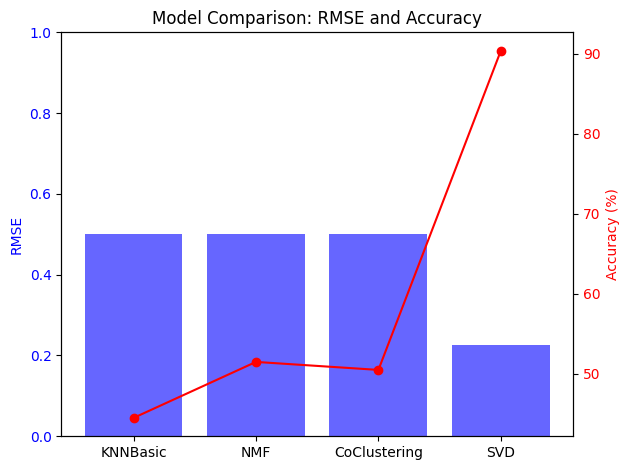

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['KNNBasic', 'NMF', 'CoClustering', 'SVD']
rmse = [0.5007, 0.4999, 0.5000, 0.2261]
accuracy = [44.5, 51.5, 50.5, 90.4]

# Create a figure and axis
fig, ax1 = plt.subplots()

# Bar plot for RMSE
ax1.bar(models, rmse, color='b', alpha=0.6, label='RMSE')
ax1.set_ylabel('RMSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set y-axis limit for RMSE
ax1.set_ylim(0, 1.0)

# Create a second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(models, accuracy, color='r', marker='o', label='Accuracy')
ax2.set_ylabel('Accuracy (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and show plot
plt.title('Model Comparison: RMSE and Accuracy')
fig.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming the Customers DataFrame is already loaded with your actual data
# Here's an example with our actual columns
data = {
    'customer_id': ['00000dbaca...', '0000423b00...', '00007d2de82...'],  # Truncated for display
    'FN': [1, 1, 1],
    'Active': [1, 1, 1],
    'club_member_status': ['ACTIVE', 'ACTIVE', 'PRE-CREATE'],
    'fashion_news_frequency': ['NONE', 'NONE', 'Regularly'],
    'age': [49, 26, 32],
    'postal_code': ['52043ee2162c...', '2973abc54daa...', '8d6f45050876d...']  # Truncated for display
}

# Create the DataFrame (replace with your actual DataFrame)
customers_df = pd.DataFrame(data)

# Use the tabulate library to display in a nice table format
table = tabulate(customers_df[['customer_id', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code']].head(3),
                 headers='keys',
                 tablefmt='grid',
                 showindex=False)

print(table)


+----------------+------+----------+----------------------+--------------------------+-------+------------------+
| customer_id    |   FN |   Active | club_member_status   | fashion_news_frequency   |   age | postal_code      |
+================+======+==========+======================+==========================+=======+==================+
| 00000dbaca...  |    1 |        1 | ACTIVE               | NONE                     |    49 | 52043ee2162c...  |
+----------------+------+----------+----------------------+--------------------------+-------+------------------+
| 0000423b00...  |    1 |        1 | ACTIVE               | NONE                     |    26 | 2973abc54daa...  |
+----------------+------+----------+----------------------+--------------------------+-------+------------------+
| 00007d2de82... |    1 |        1 | PRE-CREATE           | Regularly                |    32 | 8d6f45050876d... |
+----------------+------+----------+----------------------+--------------------------+--

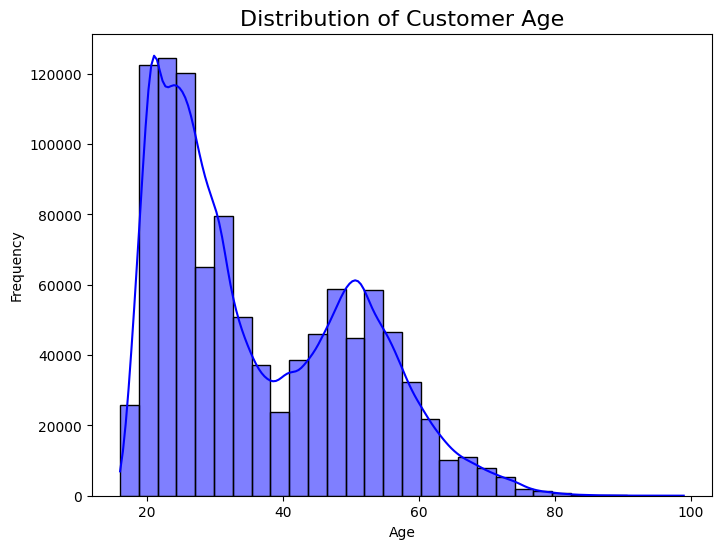

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Distribution of Age (or any other numeric feature)
plt.figure(figsize=(8, 6))
sns.histplot(customers_df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

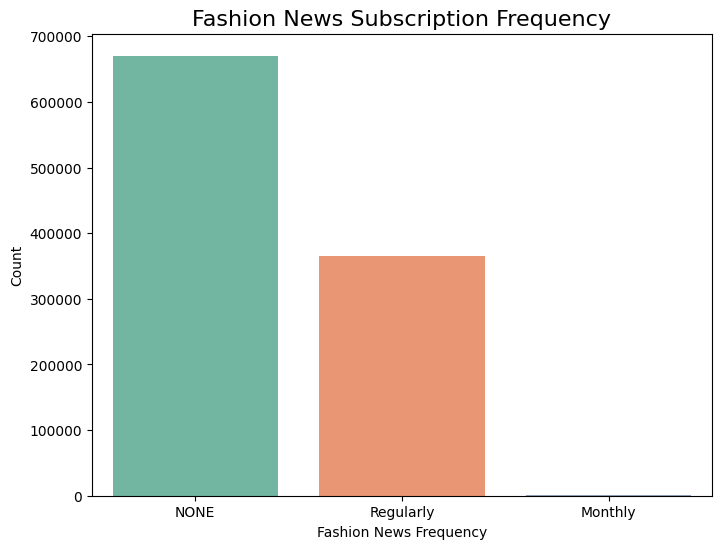

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fashion_news_frequency', hue='fashion_news_frequency', data=customers_df, palette='Set2', legend=False)
plt.title('Fashion News Subscription Frequency', fontsize=16)
plt.xlabel('Fashion News Frequency')
plt.ylabel('Count')
plt.show()


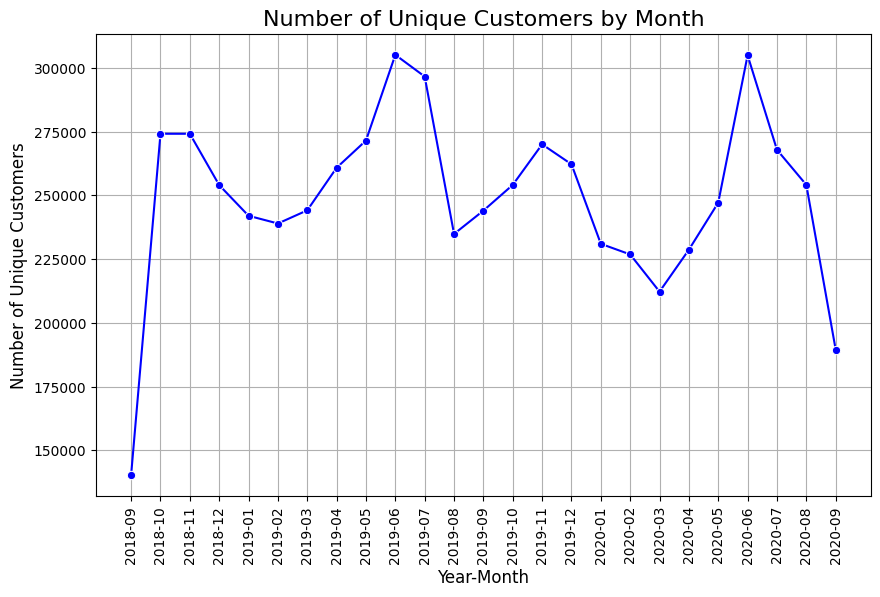

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 't_dat' to datetime format if not already
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])

# Extract the year and month from 't_dat'
transactions_df['year_month'] = transactions_df['t_dat'].dt.to_period('M')

# Convert 'year_month' to string for plotting
customers_by_month = transactions_df.groupby('year_month')['customer_id'].nunique().reset_index()
customers_by_month['year_month'] = customers_by_month['year_month'].astype(str)

# Plotting the number of unique customers by month using a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='customer_id', data=customers_by_month, marker='o', color='blue')
plt.xticks(rotation=90)
plt.title('Number of Unique Customers by Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Unique Customers', fontsize=12)
plt.grid(True)  # Add grid for better readability
plt.show()


In [ ]:
from graphviz import Digraph

dot = Digraph()

dot.node('A', 'Transactions Dataset')
dot.node('B', 'Articles Dataset')
dot.node('C', 'Merged Dataset')

dot.edges(['AB', 'BC'])
dot.render('data_merging_flowchart', format='png', cleanup=True)  # Save as PNG
dot.view()  # This will open the graph in your default viewer


'data_merging_flowchart.pdf'

In [ ]:
pip install graphviz


In [ ]:
from graphviz import Digraph

# Create a new directed graph
flowchart = Digraph(comment='Data Preprocessing Flowchart')

# Set attributes for all nodes (light blue color and border)
flowchart.attr('node', style='filled', color='lightblue', fontcolor='black', penwidth='2', border='1', fontname='Helvetica')

# Define the nodes (steps in the process)
flowchart.node('A', 'Data Cleaning')
flowchart.node('B', 'Data Encoding')
flowchart.node('C', 'Normalization')
flowchart.node('D', 'Data Merging')

# Define the edges (the flow of the process)
flowchart.edges(['AB', 'BC', 'CD'])

# Save and render the flowchart as a PNG file
flowchart.render('Data Preprocessing', format='png')

# Display the flowchart
flowchart.view()


'Data Preprocessing.pdf'

In [ ]:
from graphviz import Digraph

# Create a new directed graph
flowchart = Digraph(comment='Recommendation System Flowchart')

# Define the nodes (steps in the process)
flowchart.node('A', 'Data Collection')
flowchart.node('B', 'Data Preprocessing')
flowchart.node('C', 'Feature Engineering')
flowchart.node('D', 'Model Selection')
flowchart.node('E', 'Model Training')
flowchart.node('F', 'Generate Recommendations')
flowchart.node('G', 'Evaluation and Optimization')
flowchart.node('H', 'Feedback Loop')

# Define the edges (the flow of the process)
flowchart.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])
flowchart.edge('G', 'H', label='User Feedback')
flowchart.edge('H', 'B', label='Retrain with Feedback')

# Save and render the flowchart as a PNG file
flowchart.render('recommendation_system_flowchart', format='png')

# Display the flowchart
flowchart.view()


'recommendation_system_flowchart.pdf'

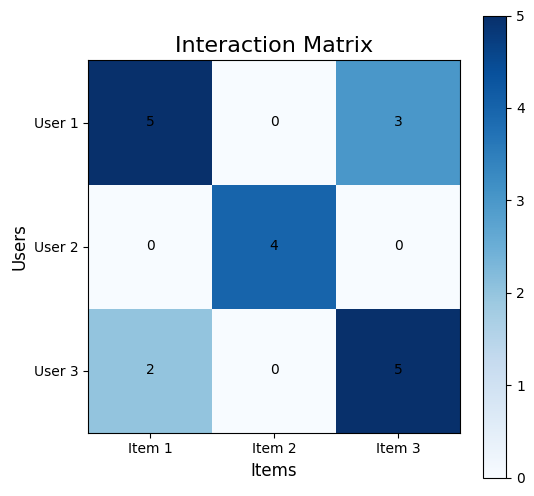

In [ ]:
import numpy as np

def interaction_matrix():
    users = ['User 1', 'User 2', 'User 3']
    items = ['Item 1', 'Item 2', 'Item 3']
    data = np.array([[5, 0, 3],
                     [0, 4, 0],
                     [2, 0, 5]])

    fig, ax = plt.subplots(figsize=(6, 6))
    heatmap = ax.imshow(data, cmap='Blues')

    # Labels
    ax.set_xticks(np.arange(len(items)))
    ax.set_yticks(np.arange(len(users)))
    ax.set_xticklabels(items)
    ax.set_yticklabels(users)

    # Displaying the interaction values
    for i in range(len(users)):
        for j in range(len(items)):
            ax.text(j, i, data[i, j], ha='center', va='center', color='black')

    # Title
    plt.title('Interaction Matrix', fontsize=16)
    plt.xlabel('Items', fontsize=12)
    plt.ylabel('Users', fontsize=12)
    plt.colorbar(heatmap)
    plt.show()

interaction_matrix()